In [1]:
%load_ext autoreload

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import sys
sys.path.append("../scripts/")  # Add the scripts folder to the path
from load_data import load_data
from data_preprocessing import clean_data, handle_outliers
import data_analysis as da
#from visualizations import plot_top_3_applications, visualize_clusters

In [2]:
%autoreload 2

In [3]:
# Load data
path = '../data/MachineLearningRating_v3.txt'
df =load_data(path)

c:\Users\Tsebaot\Desktop\week 3\Insurance-analytics\notebook\../scripts\load_data.py:11: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, delimiter='|')


File successfully converted and saved as ../data/MachineLearningRating_v3.csv


In [31]:
# For CapitalOutstanding
df['CapitalOutstanding'].unique()


array([119300, 161000, 52700, ..., 312900.0, 13700.0, 184500.0],
      shape=(1012,), dtype=object)

In [4]:
print(df['CapitalOutstanding'].apply(type).value_counts())


CapitalOutstanding
<class 'float'>    458752
<class 'int'>      377506
<class 'str'>      163840
Name: count, dtype: int64


In [33]:
# Show rows where 'CapitalOutstanding' has string data
string_values = df[df['CapitalOutstanding'].apply(lambda x: isinstance(x, str))]

# Display the filtered rows
string_values[['CapitalOutstanding']]


,CapitalOutstanding
393216,0
393217,184700
393218,0
393219,184700
393220,0
...,...
983035,13700
983036,0
983037,0
983038,0


In [9]:
print(df['CapitalOutstanding'].apply(type).value_counts())

CapitalOutstanding
<class 'float'>    1000098
Name: count, dtype: int64


In [36]:

# For CrossBorder
df['CrossBorder'].unique()


array([nan, 'No'], dtype=object)

In [5]:
df['CrossBorder'] = df['CrossBorder'].fillna('Unknown')


In [6]:

# For CrossBorder
df['CrossBorder'].unique()

array(['Unknown', 'No'], dtype=object)

In [7]:
invalid_dates = df[df['TransactionMonth'].isna() | df['VehicleIntroDate'].isna()]
print(invalid_dates[['TransactionMonth', 'VehicleIntroDate']])


           TransactionMonth VehicleIntroDate
487033  2015-02-01 00:00:00              NaN
512140  2014-10-01 00:00:00              NaN
512141  2014-12-01 00:00:00              NaN
512142  2015-03-01 00:00:00              NaN
512143  2015-05-01 00:00:00              NaN
...                     ...              ...
936561  2015-02-01 00:00:00              NaN
936562  2015-02-01 00:00:00              NaN
936563  2015-02-01 00:00:00              NaN
936564  2015-02-01 00:00:00              NaN
936565  2015-07-01 00:00:00              NaN

[552 rows x 2 columns]


In [4]:
df= clean_data(df)


c:\Users\Tsebaot\Desktop\week 3\Insurance-analytics\notebook\../scripts\data_preprocessing.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')


EDA

Data Summarization: 


Descriptive Statistics and Review the dtype


In [10]:

print(df.info())
print(df.isnull().sum())  # Ensure there are no missing values
print(df.shape)  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 53 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   UnderwrittenCoverID       1000098 non-null  int64         
 1   PolicyID                  1000098 non-null  int64         
 2   TransactionMonth          1000098 non-null  datetime64[ns]
 3   IsVATRegistered           1000098 non-null  bool          
 4   Citizenship               1000098 non-null  object        
 5   LegalType                 1000098 non-null  object        
 6   Title                     1000098 non-null  category      
 7   Language                  1000098 non-null  category      
 8   Bank                      1000098 non-null  category      
 9   AccountType               1000098 non-null  category      
 10  MaritalStatus             1000098 non-null  category      
 11  Gender                    1000098 non-null  catego

In [8]:
df.select_dtypes(include=['category']).describe()


,Title,Language,Bank,AccountType,MaritalStatus,Gender,Province,VehicleType,CrossBorder,CoverType
count,1000098,1000098,1000098,1000098,1000098,1000098,1000098,1000098,1000098,1000098
unique,5,1,11,3,3,3,9,5,1,22
top,Mr,English,First National Bank,Current account,Not specified,Not specified,Gauteng,Passenger Vehicle,No,Own Damage
freq,933555,1000098,406772,638170,994467,950526,393865,934150,1000098,104183


In [13]:
da.descriptive_stats(df)

,UnderwrittenCoverID,PolicyID,TransactionMonth,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,VehicleIntroDate,CustomValueEstimate,CapitalOutstanding,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims,Bank_missing,AccountType_missing
count,1.000098e+06,1.000098e+06,1000098,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1000098,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1000098.0,1000098.0
mean,1.048175e+05,7.956682e+03,2015-02-28 10:49:29.147423744,3.020601e+03,5.488056e+07,2.010225e+03,4.046616e+00,2.466869e+03,9.721553e+01,4.019239e+00,2008-04-21 04:54:04.261262080,2.212193e+05,5.258828e+04,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01,0.0,0.0
min,1.000000e+00,1.400000e+01,2013-10-01 00:00:00,1.000000e+00,4.041200e+06,1.987000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1977-10-01 00:00:00,2.000000e+04,-2.000000e+00,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04,0.0,0.0
25%,5.514300e+04,4.500000e+03,2015-01-01 00:00:00,8.270000e+02,6.005692e+07,2.008000e+03,4.000000e+00,2.237000e+03,7.500000e+01,4.000000e+00,2007-11-01 00:00:00,2.200000e+05,0.000000e+00,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00,0.0,0.0
50%,9.408300e+04,7.071000e+03,2015-04-01 00:00:00,2.000000e+03,6.005842e+07,2.011000e+03,4.000000e+00,2.694000e+03,1.110000e+02,4.000000e+00,2010-10-01 00:00:00,2.200000e+05,0.000000e+00,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00,0.0,0.0
75%,1.391900e+05,1.107700e+04,2015-06-01 00:00:00,4.180000e+03,6.005842e+07,2.013000e+03,4.000000e+00,2.694000e+03,1.110000e+02,4.000000e+00,2012-04-01 00:00:00,2.200000e+05,0.000000e+00,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00,0.0,0.0
max,3.011750e+05,2.324600e+04,2015-08-01 00:00:00,9.870000e+03,6.506535e+07,2.015000e+03,1.000000e+01,1.288000e+04,3.090000e+02,6.000000e+00,2014-09-01 00:00:00,2.655000e+07,7.000000e+05,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05,0.0,0.0
std,6.329371e+04,5.290039e+03,NaN,2.649854e+03,1.360059e+07,3.261391e+00,2.939410e-01,4.427106e+02,1.939061e+01,4.681854e-01,NaN,2.650521e+05,1.114033e+05,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03,0.0,0.0


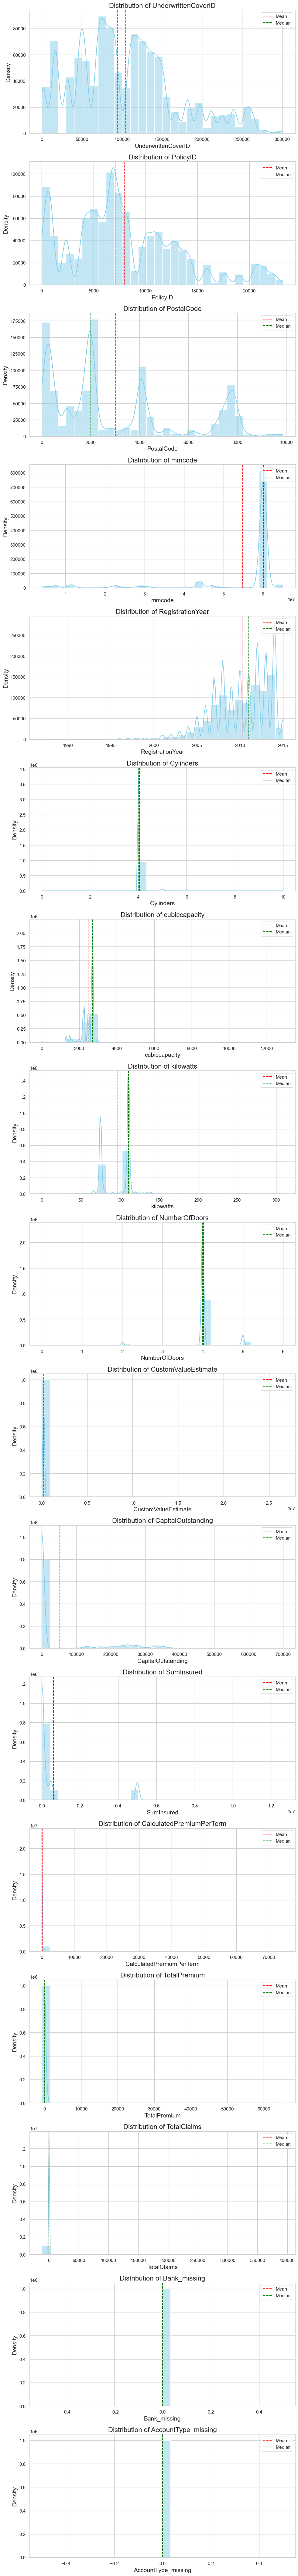

In [39]:
da.plot_distribution(df)

Univariate Analysis:

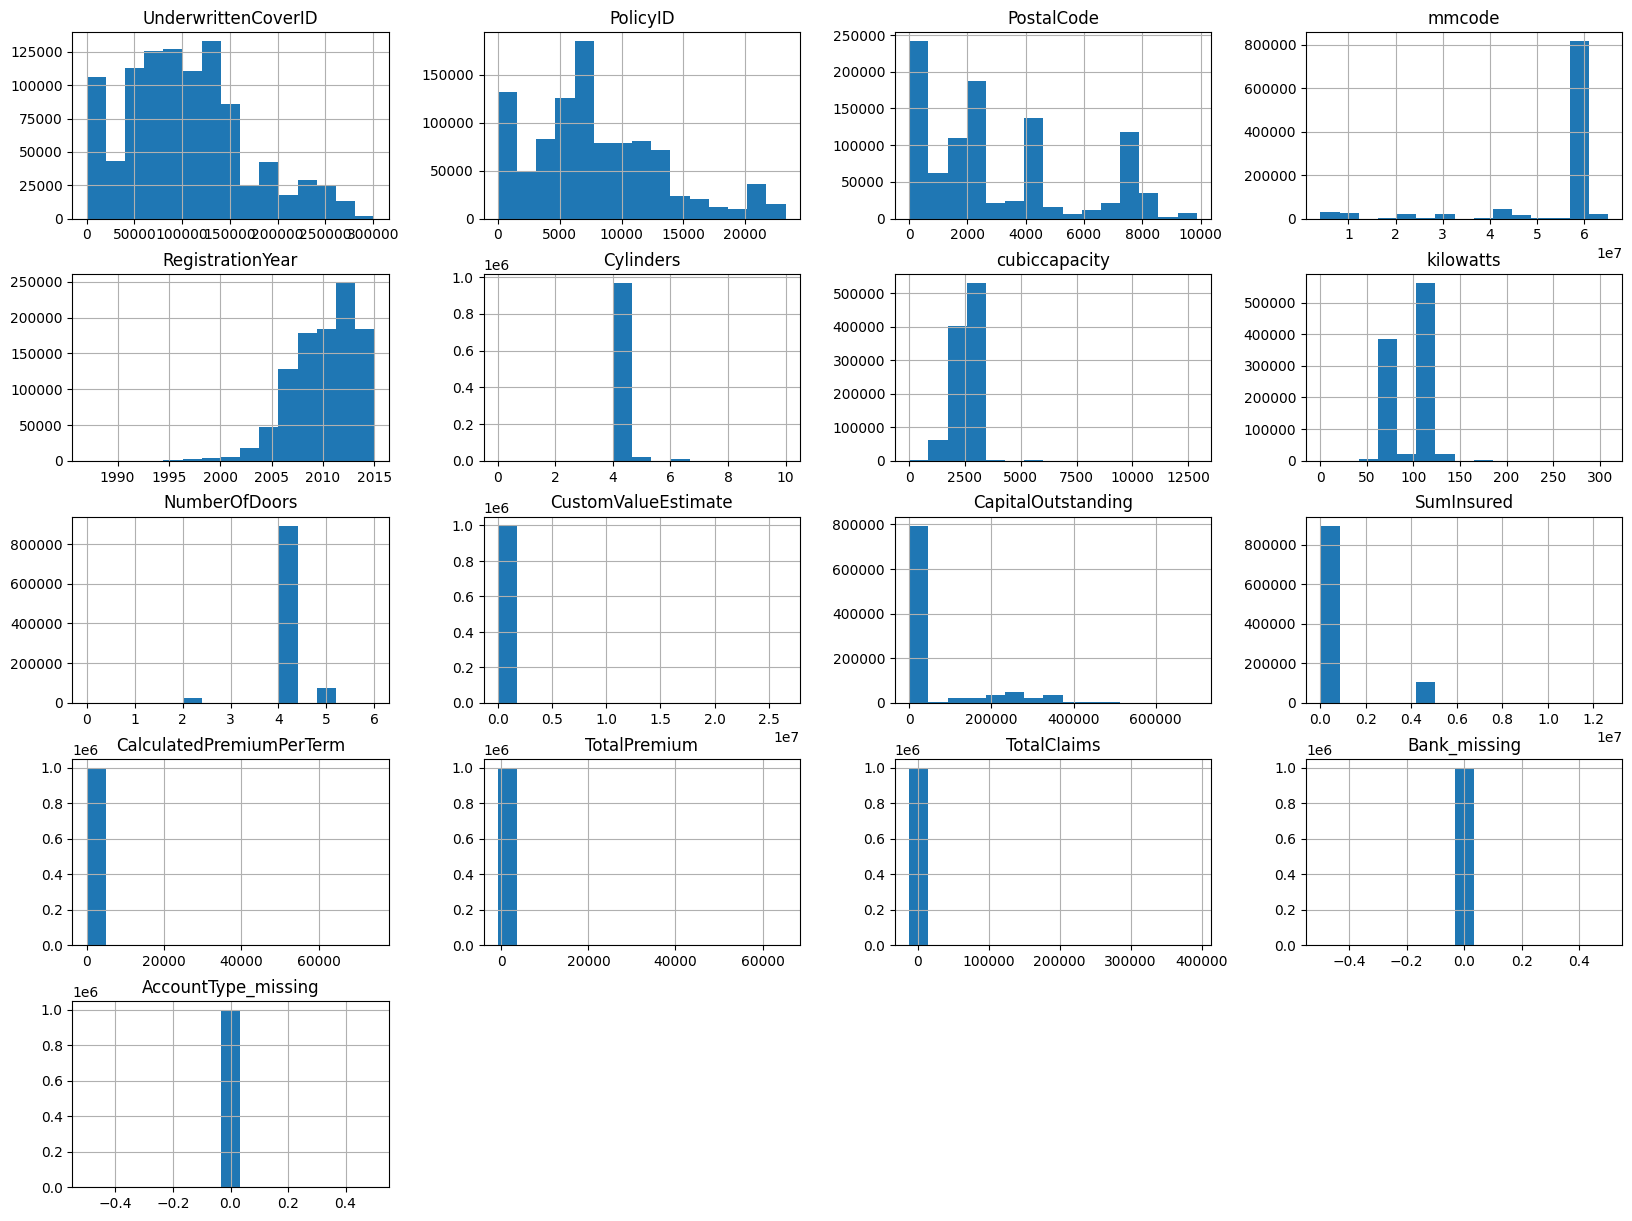

In [29]:
da.plot_histograms(df)

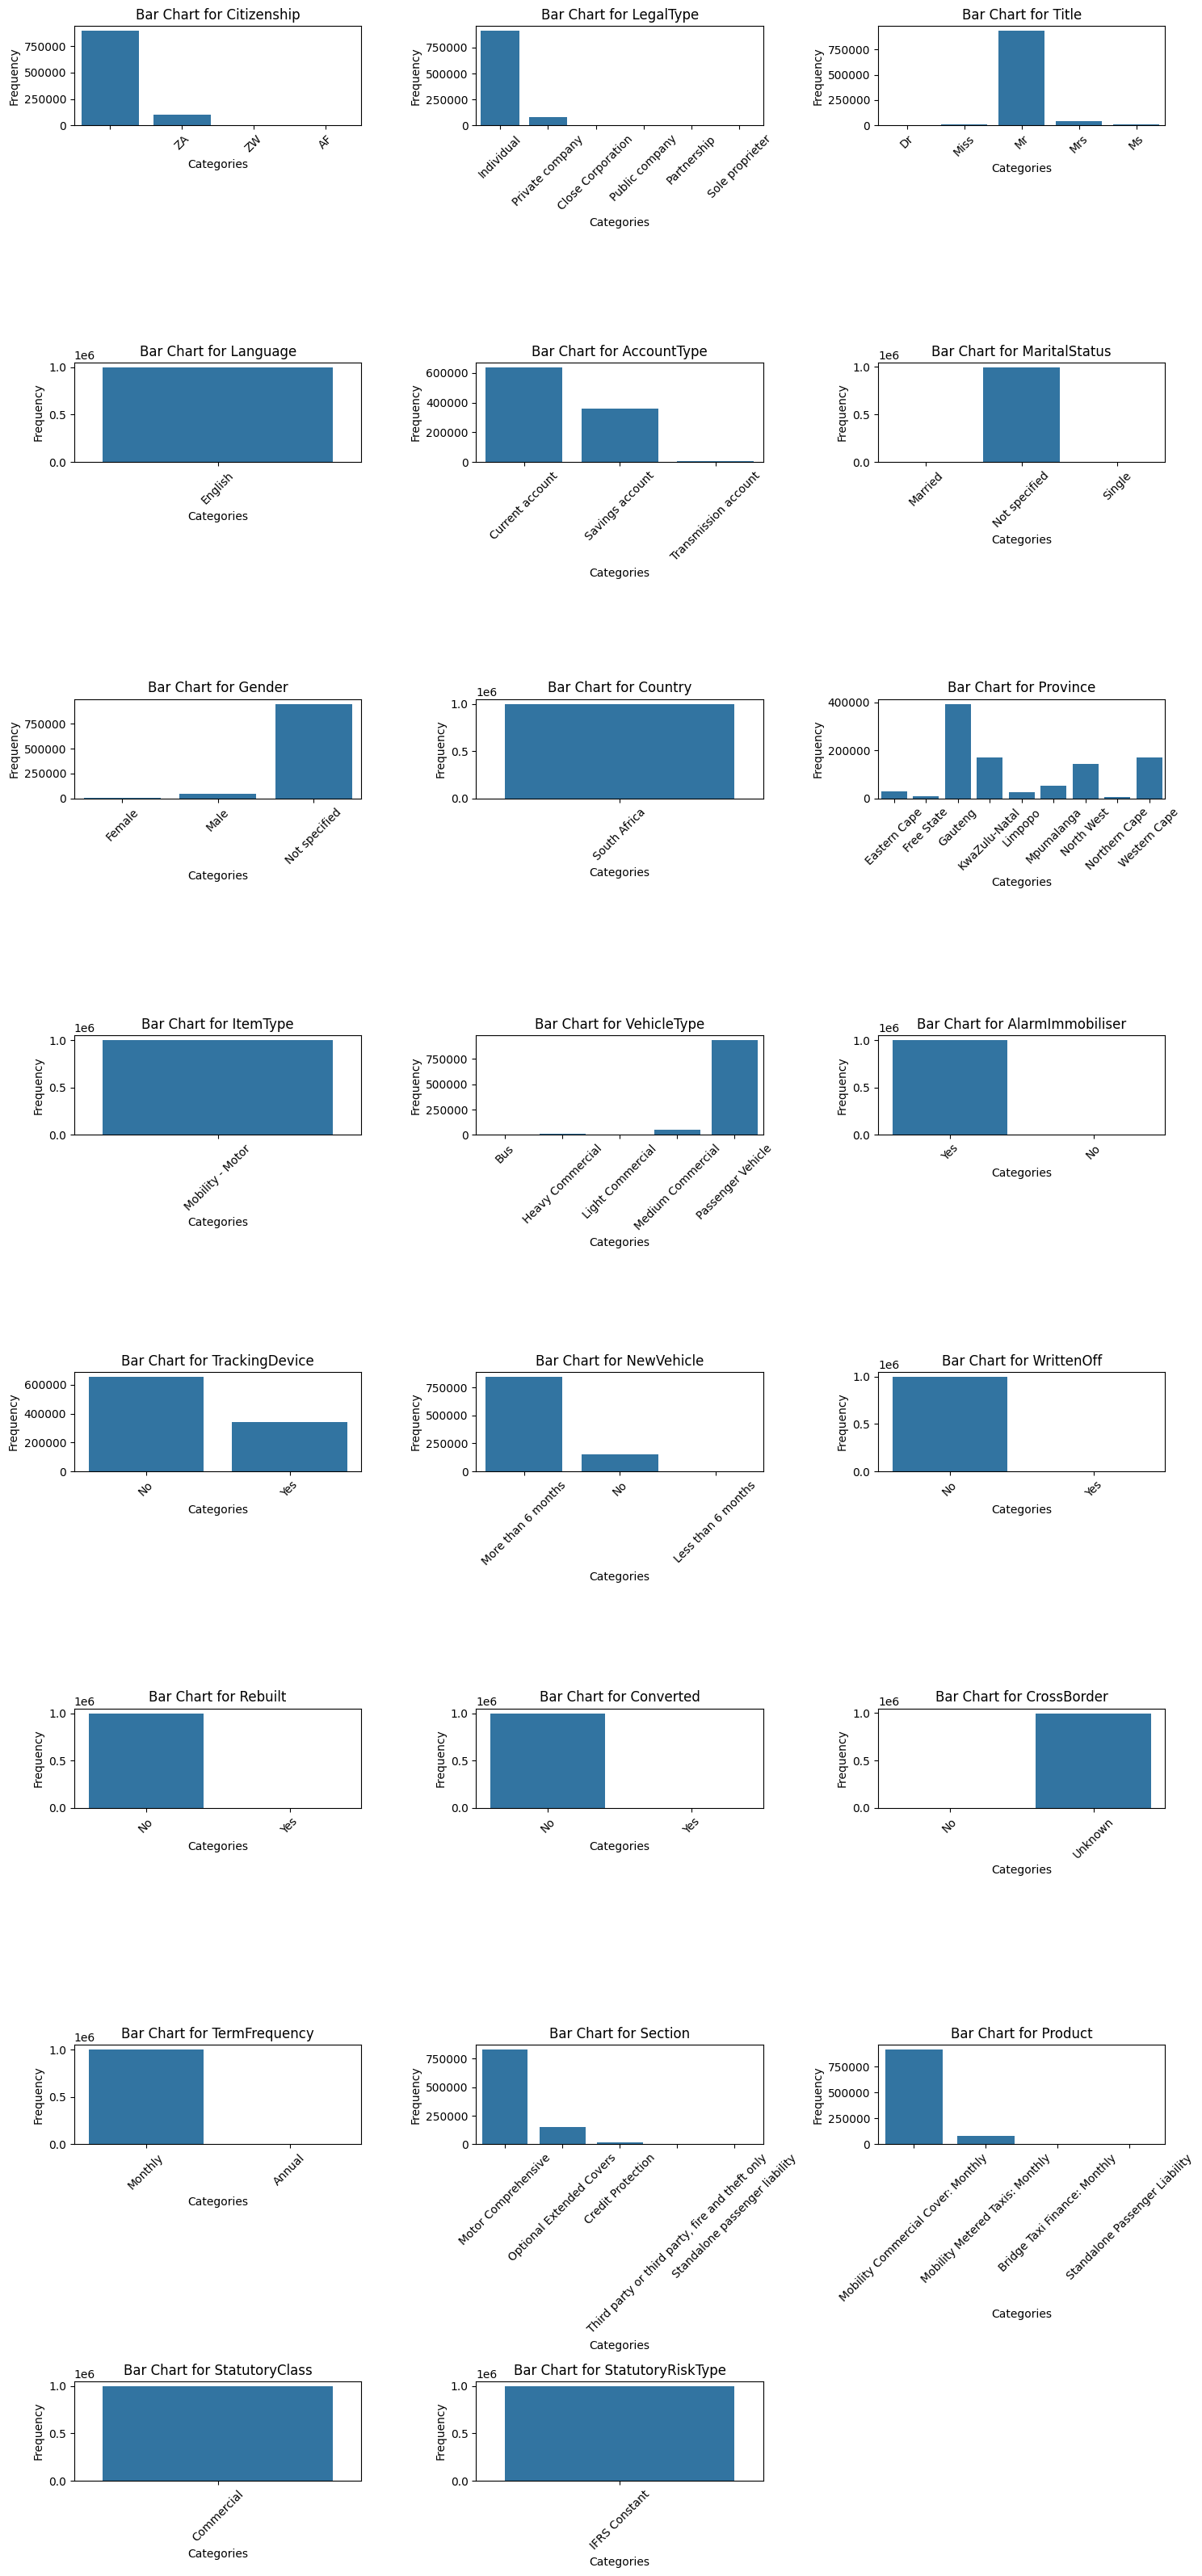

In [38]:
da.plot_bar_charts(df)

Bivariate or Multivariate Analysis:

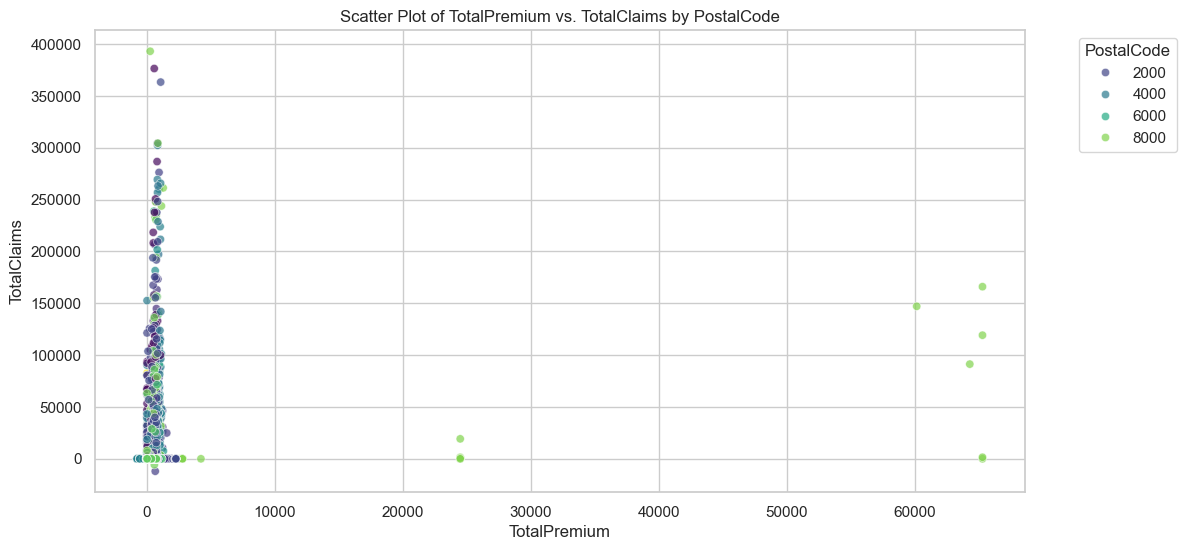

In [40]:
#relationships between the monthly changes TotalPremium and TotalClaims as a function of postalCode
#Scatter Plot of TotalPremium vs. TotalClaims
da.plot_Premium_vs_claims(df)


Correlation Matrix:
              TotalPremium  TotalClaims
TotalPremium      1.000000     0.121588
TotalClaims       0.121588     1.000000


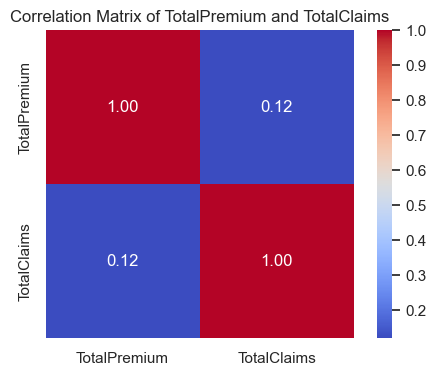

In [41]:
# Plotting the correlation matrix 
da.Correlation_of_premium_claims(df)

In [43]:
# Grouping by PostalCode and calculating average TotalPremium and TotalClaims
print(da.postal_code_analysis(df))


Average TotalPremium and TotalClaims by PostalCode:
     PostalCode  TotalPremium  TotalClaims
0             1     51.120638    57.589092
1             2     40.901700    41.589582
2             4    113.947737     0.000000
3             5     61.653626   207.378816
4             6     50.591432    19.610447
..          ...           ...          ...
883        9781     54.553324   139.499604
884        9830    131.760895     0.000000
885        9868    116.042377     0.000000
886        9869     44.774438     1.580807
887        9870     80.469292     0.000000

[888 rows x 3 columns]
None



Inspecting time_trend_analysis DataFrame:
YearMonth       datetime64[ns]
TotalPremium           float64
TotalClaims            float64
dtype: object
   YearMonth  TotalPremium  TotalClaims
0 2013-10-01      8.245856     0.000000
1 2013-11-01     17.815608    42.295217
2 2013-12-01     28.417892     6.209623
3 2014-01-01     29.603282     6.807258
4 2014-02-01     29.480328    30.547676


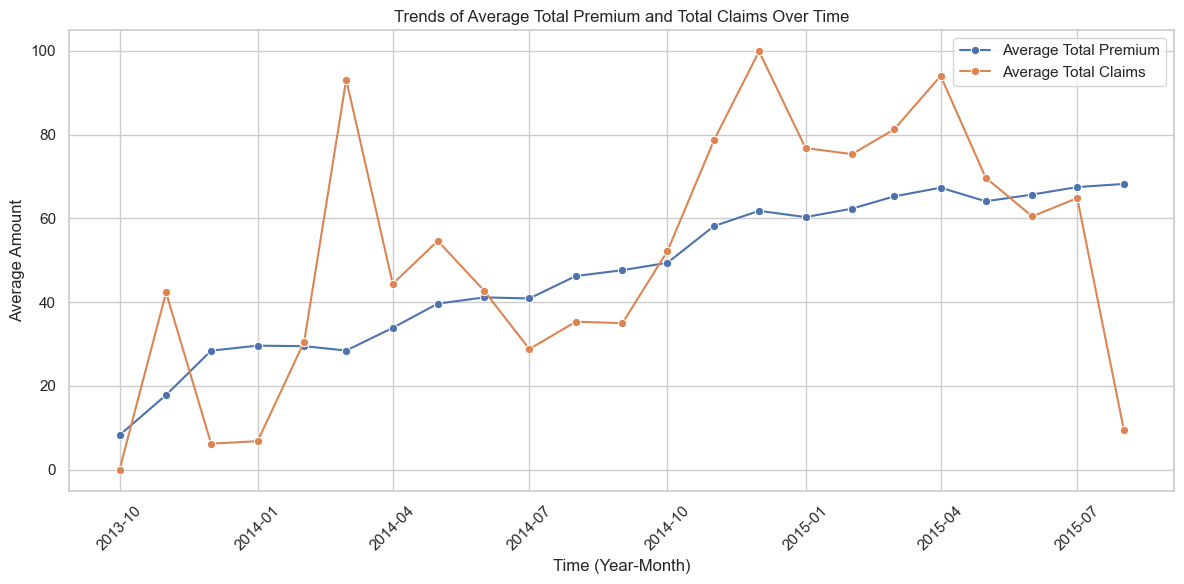

In [58]:
#Trends Over Time for TotalPremium and TotalClaims
da.time_trend_analysis(df)

Data Comparison

Average TotalPremium and TotalClaims by Province and Cover Type:
         Province                                CoverType  TotalPremium  \
0    Eastern Cape                         Accidental Death     27.202256   
1    Eastern Cape                    Asset Value Preserver     47.877759   
2    Eastern Cape                          Baggage/Luggage     11.101193   
3    Eastern Cape                      Basic Excess Waiver     46.610732   
4    Eastern Cape  Cleaning and Removal of Accident Debris      3.609455   
..            ...                                      ...           ...   
154  Western Cape                Signage and Vehicle Wraps      1.001131   
155  Western Cape           Standalone passenger liability     39.783475   
156  Western Cape                              Third Party    116.755869   
157  Western Cape                                  Trailer      6.607055   
158  Western Cape                               Windscreen     10.835787   

     TotalClaims  
0  

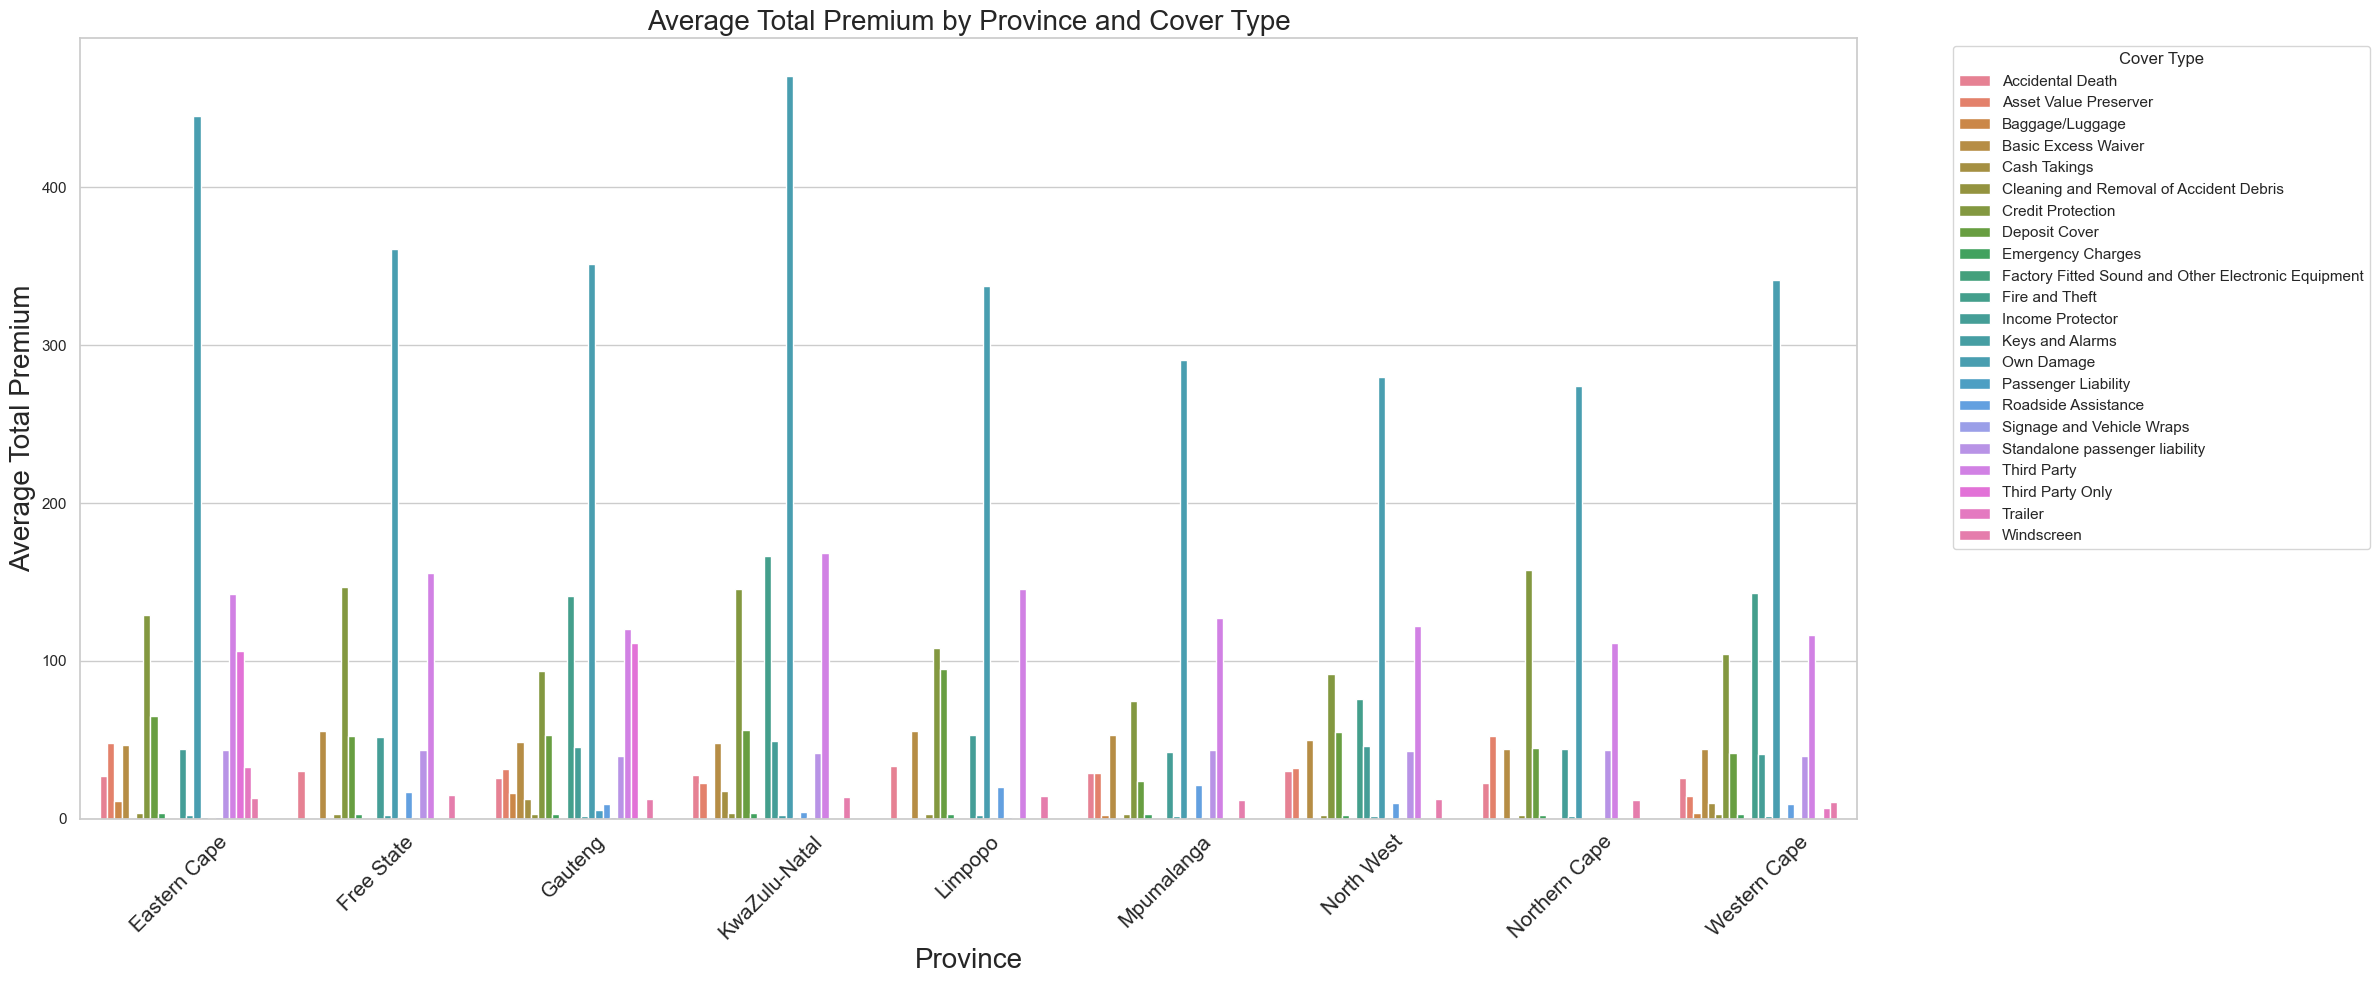

In [50]:
#Trends Over Geography: 
#Compare the change in insurance cover type
da.cover_type_analysis(df)


Average TotalPremium and TotalClaims by Auto Make:
                                   make  TotalPremium  TotalClaims
0                                  AUDI     50.799827   137.843083
1                                 B.A.W     76.872229   132.934016
2                                   BMW     45.658312    90.558050
3                                 C.A.M     37.571153    43.021964
4   CHERY                                   47.384840     0.000000
5                             CHEVROLET     32.873440     9.015870
6   CITROEN                                 29.902841     0.000000
7                                   CMC     44.277007    61.210485
8                              DAIHATSU     43.859649     0.000000
9                                  FIAT    106.317863   108.625642
10                                 FORD     49.429381     4.778627
11  FORD                                    36.428579     0.000000
12                                FOTON     41.283083     3.488588
13  GEELY 

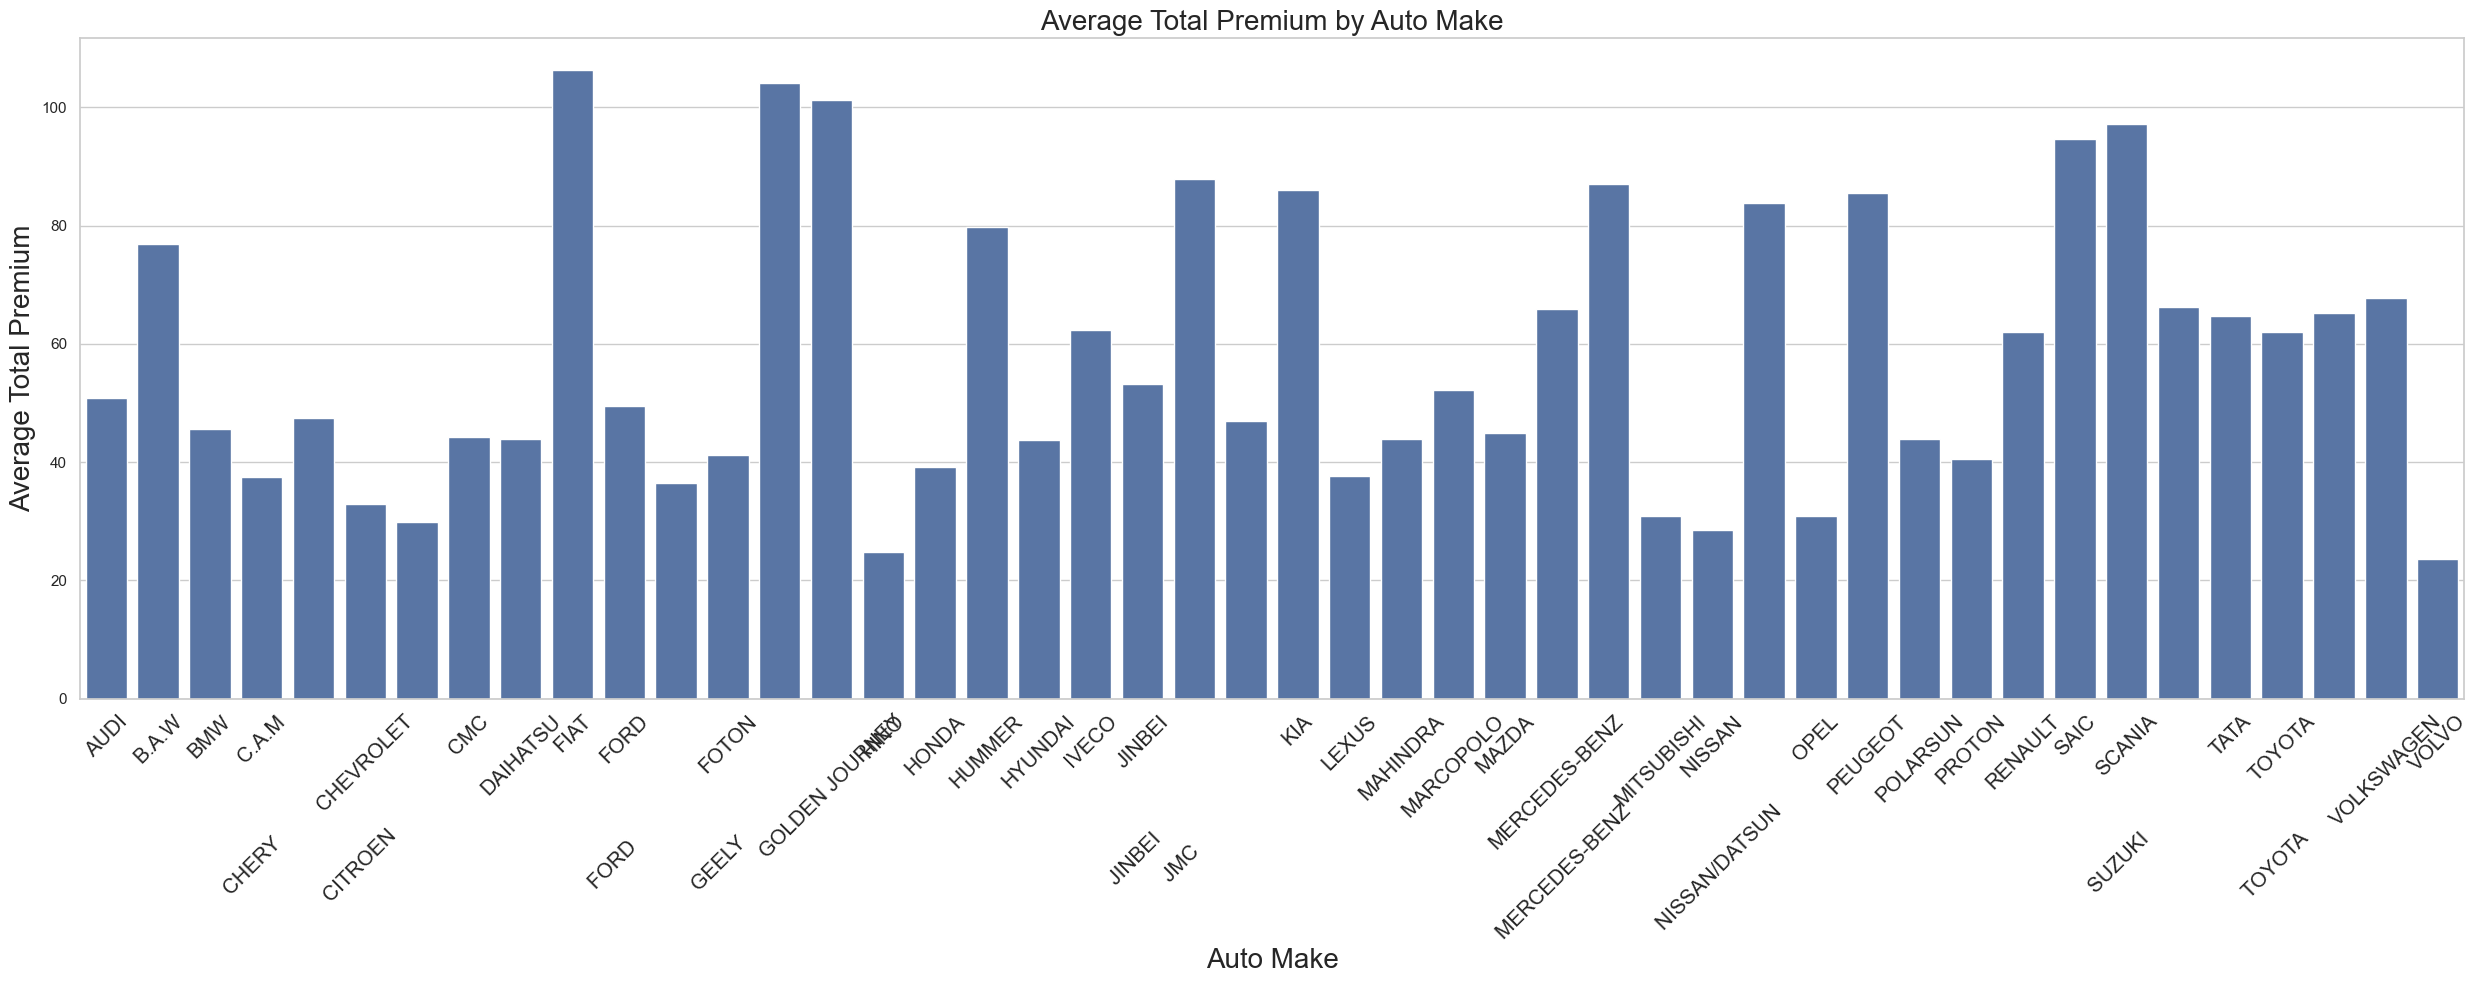

In [53]:
#Compare the change in Auto Make
da.auto_make_analysis(df)

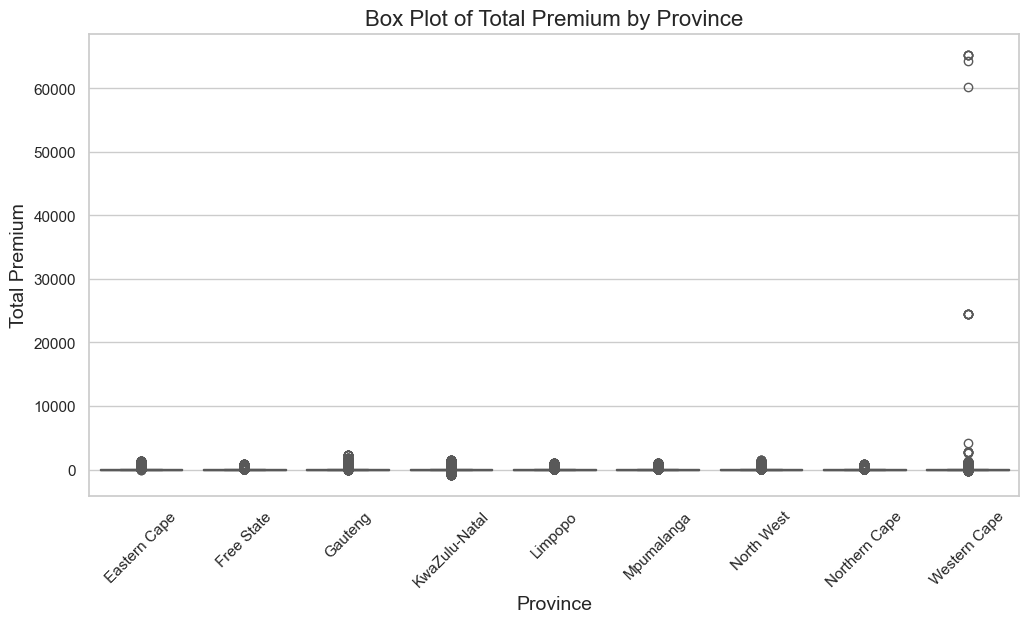

In [54]:
#Compare the change in TotalPremium by Province
da.Province_analysis(df)

Correlations

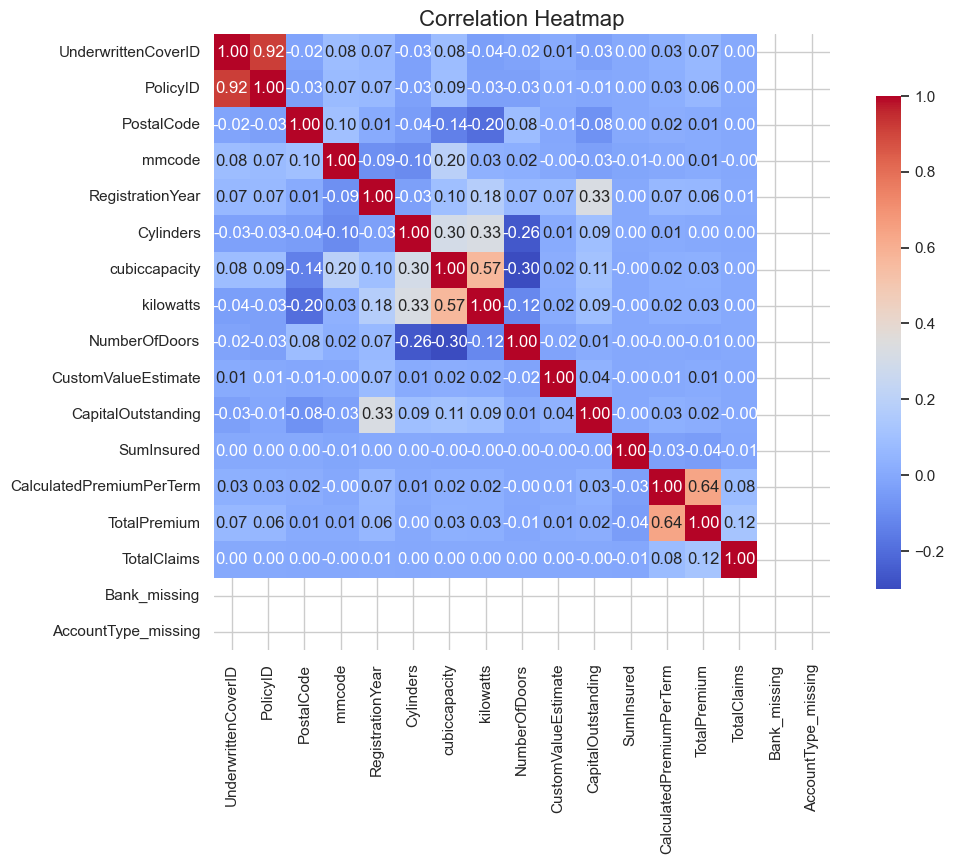

In [ ]:
#correlation between numerical columns
da.correlation(df)

Outlier Detection:

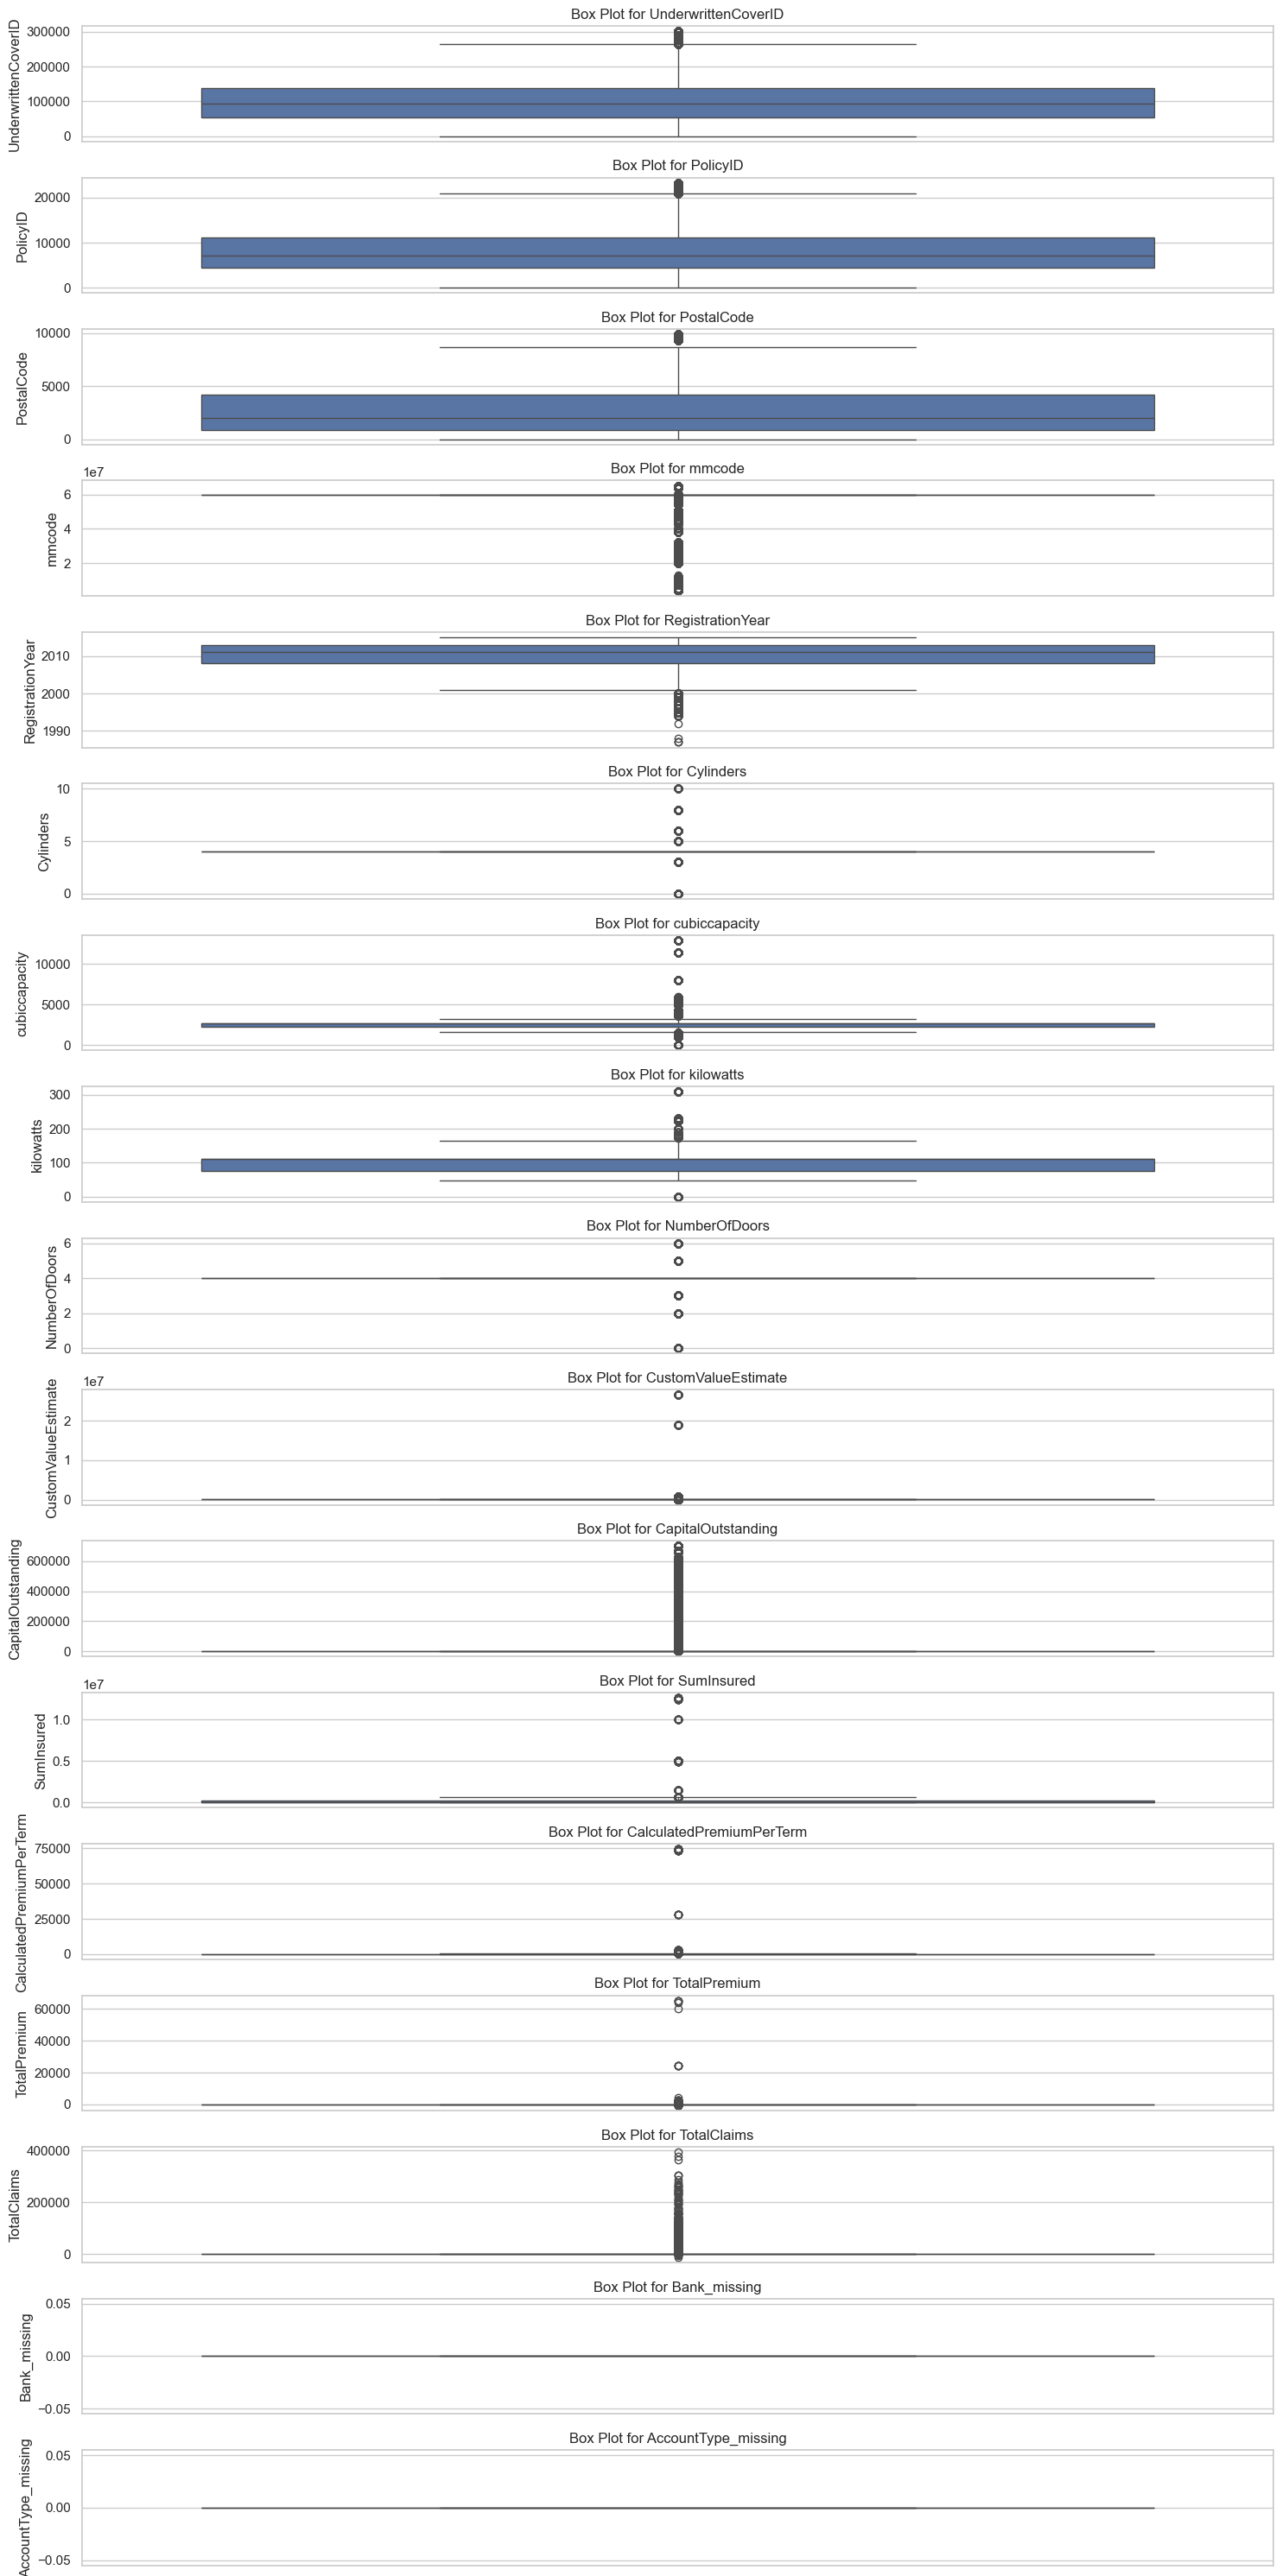

In [57]:
#Plot boxplots for numerical columns to detect outliers.
da.plot_boxplots(df)

In [6]:
df['Province'].unique()

['Gauteng', 'KwaZulu-Natal', 'Mpumalanga', 'Eastern Cape', 'Western Cape', 'Limpopo', 'North West', 'Free State', 'Northern Cape']
Categories (9, object): ['Eastern Cape', 'Free State', 'Gauteng', 'KwaZulu-Natal', ..., 'Mpumalanga', 'North West', 'Northern Cape', 'Western Cape']

In [7]:
df['PostalCode'].unique()

array([1459, 1513, 1619, 1625, 1629, 1852, 1982, 2007, 2066, 4093, 2000,
       1577, 1610, 2410, 6200,  122, 1520, 1709, 1739, 4000, 4066, 4091,
       4342, 4359, 7784,  970, 6213, 6390, 1868, 4310,  299,  309,  152,
        181, 1821, 4449, 4037,  139, 4074, 1057, 7100, 9725, 1863, 1875,
       2001, 2091, 3170, 3950, 1021, 2380,  300,  302,  458, 7750,  157,
       4811, 4930, 5000, 5090, 5160, 5219, 5410, 5920, 6025, 6139, 5040,
       6201, 6212, 6231, 9744,    1,    8,   64,   84,  162,  164, 8000,
        182,  183,  186,  190, 5326,  192,  194,  199,  200,  201,  208,
        258,  264, 1431, 1441, 1455, 1494, 1496,  284, 9762, 1507, 1540,
       1559, 1571, 1724, 1754, 1757, 1759, 1779, 1803, 1804, 1806, 1809,
       1818, 1828, 1830, 1862, 1864, 1865, 1984, 2014, 2019, 2021, 2040,
       2090, 2188, 2198, 3180, 3200, 3245, 3310, 3380, 3609, 3610, 3612,
       3613, 3370, 3600, 3629, 3630, 3650, 3780, 3900, 3934, 3973, 5143,
       3880, 3882, 3915, 4001, 4004, 4011, 4023, 40